<a href="https://colab.research.google.com/github/ush-naaa/DevHUB/blob/main/DEC/Task%202/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

##**Load dataset**

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##**Exploratory Data Analysis (EDA)**

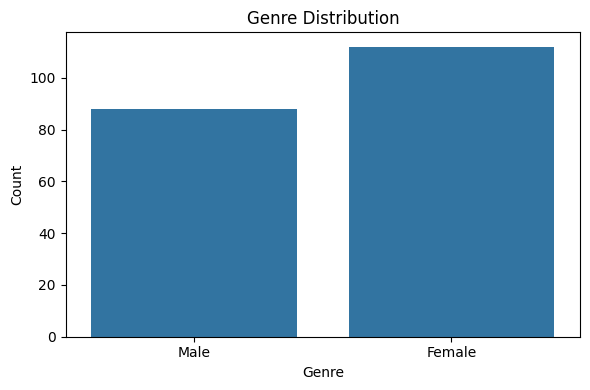

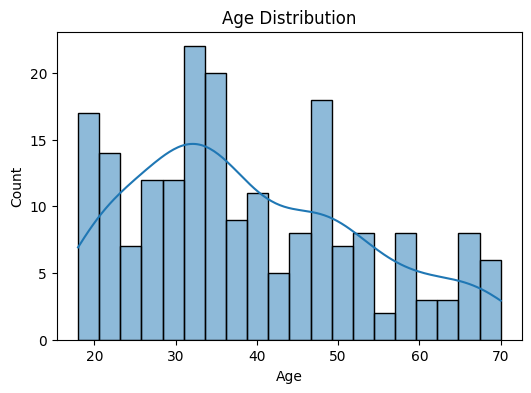

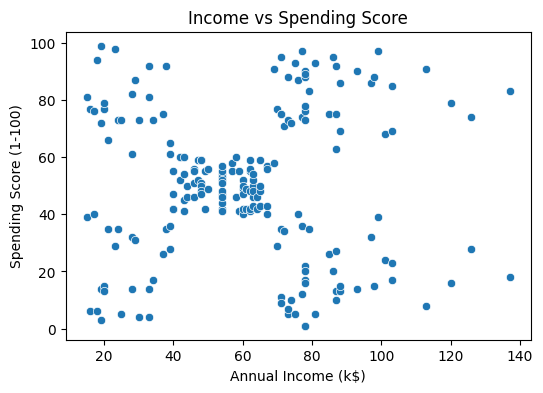

In [6]:
# Basic Statistics
df.describe()

# Genre Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=df)
plt.title("Genre Distribution", fontsize=12)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Income vs Spending
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()


##**Data Preprocessing**

In [8]:
# Encode Categorical Feature
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Feature Selection
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



##**K-Means Clustering**

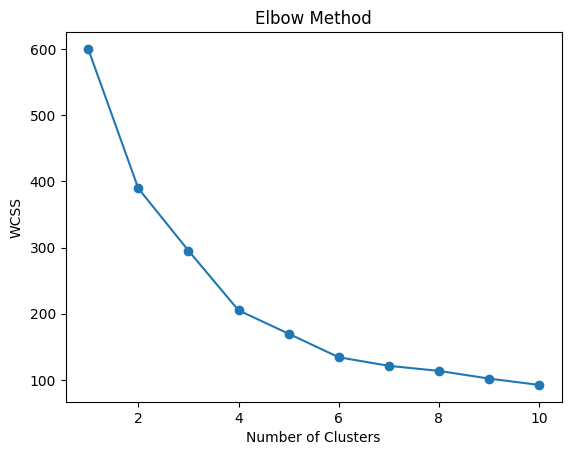

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,NaN,19,15,39,2
1,2,NaN,21,15,81,2
2,3,NaN,20,16,6,3
3,4,NaN,23,16,77,2
4,5,NaN,31,17,40,2


In [10]:
# Elbow Method
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Train Final K-Means Model
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()



## **Cluster Visualization**

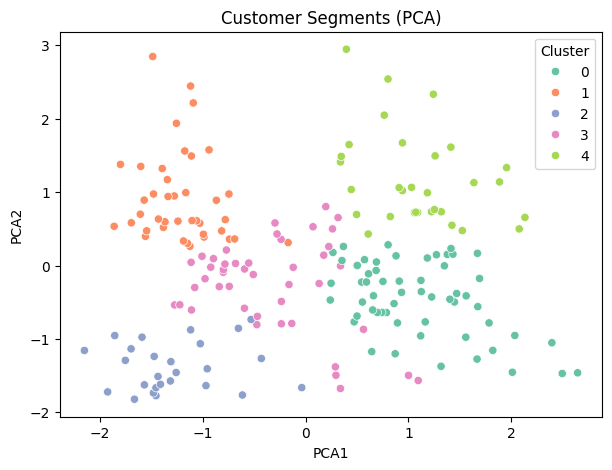

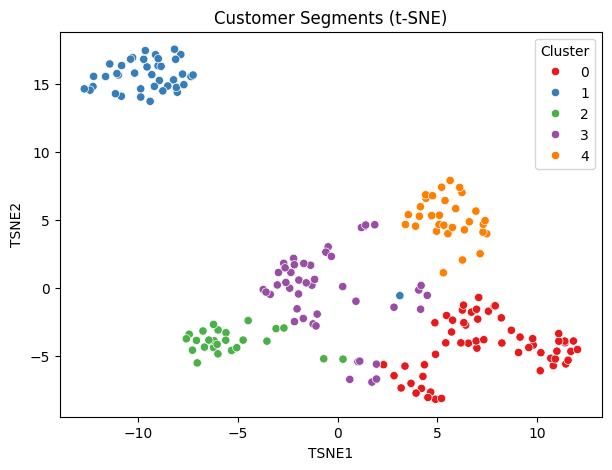

In [11]:
#PCA Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    data=df
)
plt.title("Customer Segments (PCA)")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.title("Customer Segments (t-SNE)")
plt.show()


##**Cluster Analysis**

In [13]:
cluster_summary = df.groupby('Cluster')[[
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)'
]].mean()

cluster_summary



,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


## **Marketing Strategy Recommendations**

Based on the characteristics of each customer cluster, the following marketing
strategies are recommended:

**Cluster 0 – Low Income, Low Spending**
- Focus on discounts, coupons, and budget-friendly products
- Promote seasonal sales to encourage purchases

**Cluster 1 – High Income, High Spending**
- Target customers with premium and luxury products
- Offer loyalty programs and exclusive deals

**Cluster 2 – High Income, Low Spending**
- Use personalized promotions to increase engagement
- Encourage spending through limited-time offers

**Cluster 3 – Low Income, High Spending**
- Provide value-for-money bundles
- Reward frequent purchases with incentives

**Cluster 4 – Moderate Income and Spending**
- Maintain balanced marketing campaigns
- Cross-sell and upsell relevant products
